In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('2024-01-08T16-49-15.846Z-shop data.csv')

In [3]:
df

,age,income,gender,m_status,buys
0,<25,high,male,single,no
1,<25,high,male,married,no
2,25-35,high,male,single,yes
3,>35,medium,male,single,yes
4,>35,low,female,single,yes
5,>35,low,female,single,no
6,25-35,low,female,married,yes
7,<25,medium,male,married,no
8,<25,low,female,single,yes
9,>35,medium,female,married,yes


In [4]:
x = df.drop('buys',axis = 1)

In [5]:
x

,age,income,gender,m_status
0,<25,high,male,single
1,<25,high,male,married
2,25-35,high,male,single
3,>35,medium,male,single
4,>35,low,female,single
5,>35,low,female,single
6,25-35,low,female,married
7,<25,medium,male,married
8,<25,low,female,single
9,>35,medium,female,married


In [6]:
y = df['buys']

In [7]:
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
14     no
15    yes
16    yes
17    yes
18    yes
19    yes
20     no
21    yes
Name: buys, dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder
le_x = LabelEncoder()
le = x.apply(le_x.fit_transform) 

In [11]:
le

,age,income,gender,m_status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,1
6,0,1,0,0
7,1,2,1,0
8,1,1,0,1
9,2,2,0,0


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(le,y,test_size = 0.3,random_state = 4)

In [20]:
x_train

,age,income,gender,m_status
2,0,0,1,1
4,2,1,0,1
17,1,0,0,1
16,2,2,1,0
21,1,1,1,1
13,2,2,1,0
7,1,2,1,0
12,0,0,0,1
10,1,2,0,1
9,2,2,0,0


In [21]:
y_train

2     yes
4     yes
17    yes
16    yes
21    yes
13     no
7      no
12    yes
10    yes
9     yes
18    yes
8     yes
1      no
5      no
14     no
Name: buys, dtype: object

In [22]:
x_test

,age,income,gender,m_status
20,2,2,0,0
19,0,0,1,1
0,1,0,1,1
3,2,2,1,1
6,0,1,0,0
11,0,2,1,0
15,1,0,0,0


In [23]:
y_test

20     no
19    yes
0      no
3     yes
6     yes
11    yes
15    yes
Name: buys, dtype: object

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
y_test


20     no
19    yes
0      no
3     yes
6     yes
11    yes
15    yes
Name: buys, dtype: object

In [28]:
dt.predict(x_test)

array(['yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes'], dtype=object)

In [31]:
dt.score(x_test,y_test)

0.7142857142857143

## Cross value score

In [40]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(DecisionTreeClassifier(), le ,y ,cv=5)
result

array([0.6 , 0.6 , 0.75, 0.25, 0.5 ])

In [41]:
result.mean()

0.54

In [45]:
from sklearn.linear_model import LogisticRegression
result = cross_val_score(LogisticRegression(),le,y,cv=5)
result

array([0.4 , 0.6 , 0.75, 0.5 , 0.75])

In [47]:
result.mean()

0.6

In [50]:
from sklearn.neighbors import KNeighborsClassifier
result = cross_val_score(KNeighborsClassifier(n_neighbors = 3),le,y,cv=5)
result

array([0.4 , 0.4 , 0.75, 0.5 , 0.5 ])

In [51]:
result.mean()

0.51

In [53]:
y_predict = dt.predict(x_test)
y_predict

array(['yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes'], dtype=object)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

          no       0.50      0.50      0.50         2
         yes       0.80      0.80      0.80         5

    accuracy                           0.71         7
   macro avg       0.65      0.65      0.65         7
weighted avg       0.71      0.71      0.71         7



In [59]:
xinput = np.array([1,0,1,1])

In [61]:
y_predict = dt.predict([xinput])

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [62]:
y_predict

array(['no'], dtype=object)

In [63]:
x.columns.tolist()

['age', 'income', 'gender', 'm_status']

[Text(0.36363636363636365, 0.9166666666666666, 'gender <= 0.5\ngini = 0.444\nsamples = 15\nvalue = [5, 10]'),
 Text(0.18181818181818182, 0.75, 'age <= 1.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.09090909090909091, 0.5833333333333334, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.2727272727272727, 0.5833333333333334, 'm_status <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.18181818181818182, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.36363636363636365, 0.4166666666666667, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5454545454545454, 0.75, 'age <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.45454545454545453, 0.5833333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6363636363636364, 0.5833333333333334, 'income <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.5454545454545454, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7272727272727273, 0.416666666666

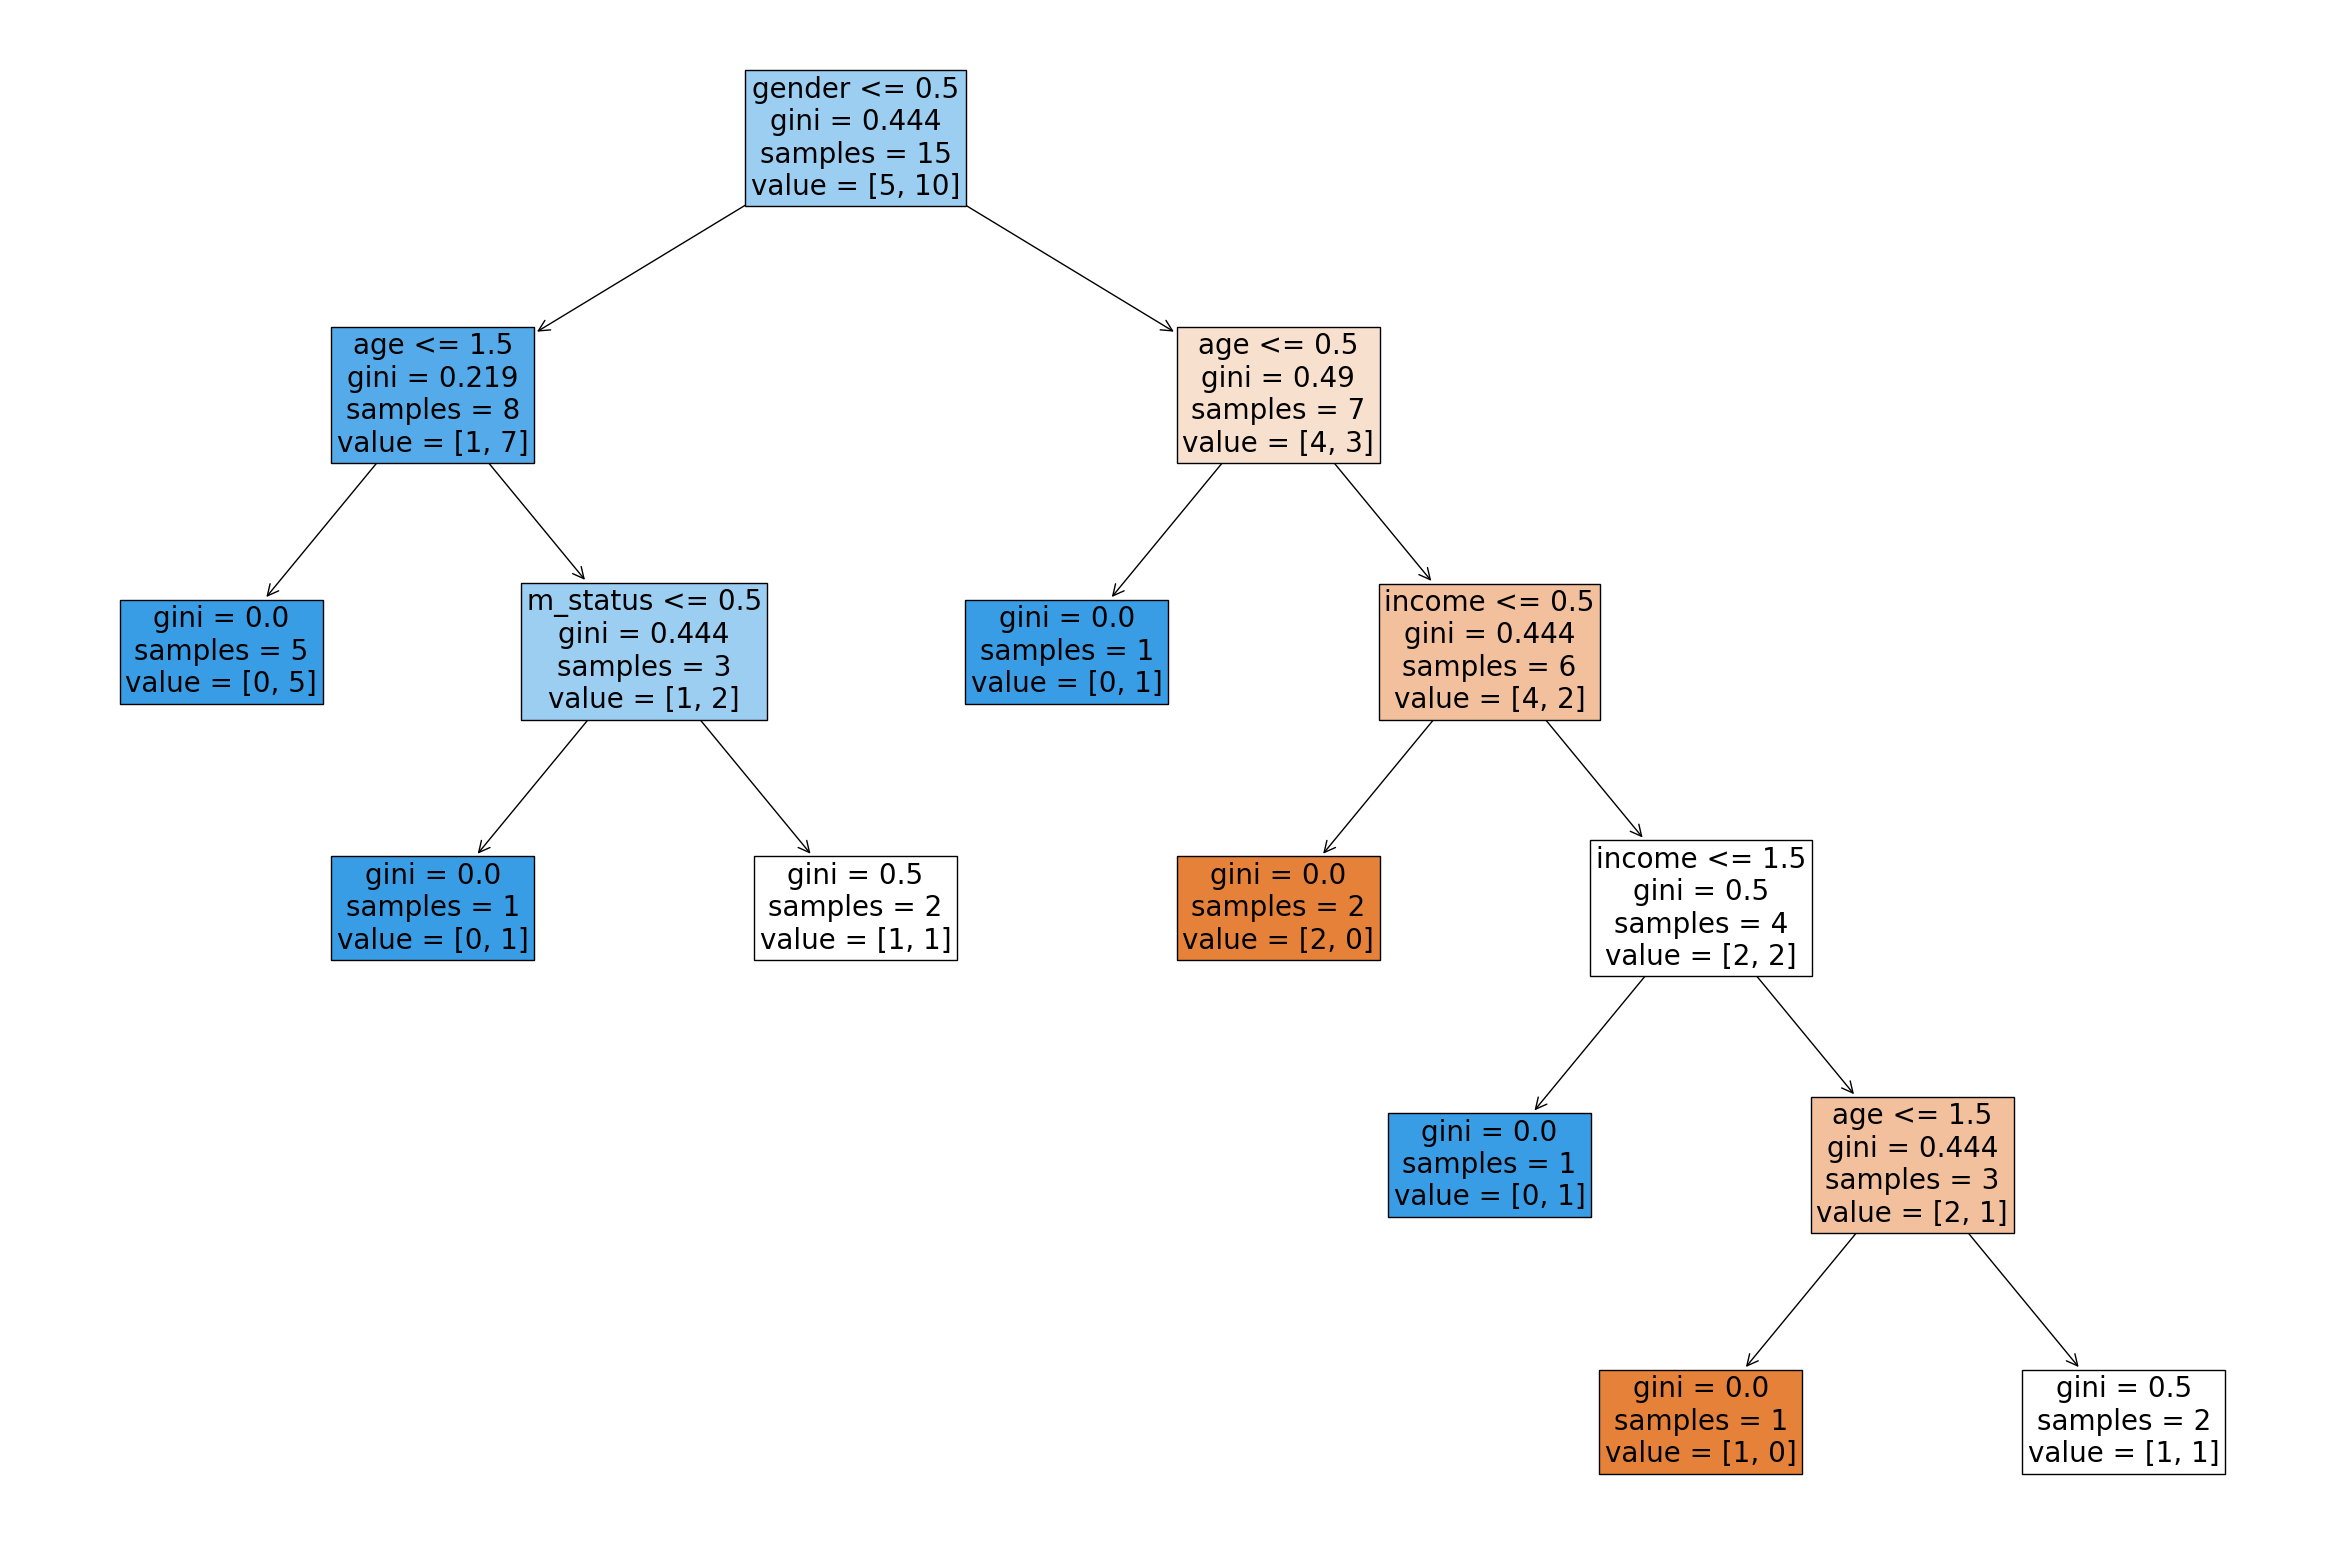

In [64]:
from sklearn import tree
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(30,20))
tree.plot_tree(dt, feature_names=x.columns.tolist(), filled=True, fontsize=20)